<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/24%20-%20Sklearn%20%3A%20Apprentissage%20Non-supervis%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 24/30 Apprentissage Non-Supervisé

In [3]:
run /Users/floriangustin/Documents/esgi_machine_learning/templates/modules/chargement_data.ipynb

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import metrics

## 1. K-Means Clustering

In [5]:
from sklearn.cluster import KMeans

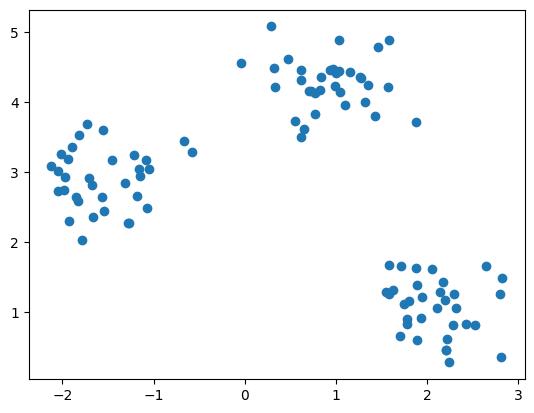

In [7]:
# Génération de données
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

# Modélisation

## Kmeans

In [16]:
# création du modèle
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(X)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [17]:
# Evaluation
print(model_kmeans.score(X))
model_kmeans.inertia_

-30.870531280140675


30.870531280140675

In [18]:
clustering_labels_km = model_kmeans.fit_predict(X)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
clustering_labels_km

array([1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2,
       2, 2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0], dtype=int32)

In [45]:
X1 = X.copy()
X1 = pd.DataFrame(X1)


clustering_labels_km

X1['labels'] = clustering_labels_km

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [46]:
metrics.silhouette_score(X1, X1['labels'])

In [47]:
#Création des clusters/classes sur la base train
clusters_kmeans = model_kmeans.predict(X)

clusters_kmeans


0.6512490774053474

In [48]:
import pandas as pd

clusters_kmeans1 = pd.DataFrame({'clusters':clusters_kmeans})
clusters_kmeans1['clusters'].value_counts()



array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [49]:
clusters_kmeans1

2    2576
0    2460
1    1058
Name: clusters, dtype: int64

In [50]:
# Visualisation des clusters
plt.scatter(X[:,0], X[:,1], c = clusters_kmeans)
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], c='r')

,clusters
0,1
1,1
2,1
3,1
4,1
...,...
6089,0
6090,0
6091,0
6092,0


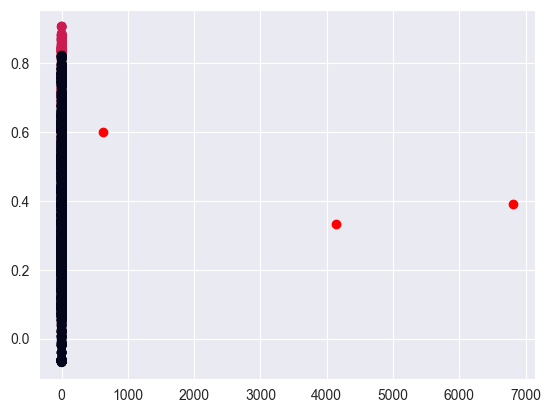

In [51]:
# connaitre le nombre de variables explicatives
model_kmeans.n_features_in_

In [52]:
# connaitre le nombre de cluster
model_kmeans.n_clusters

50

In [53]:
# connaitre les centres
model_kmeans.cluster_centers_

3

### Elbow Method

In [12]:
# Recherche du k optimal par la méthode du coude
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

C:\Users\Lewis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [55]:
# Visualisation du coude
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Inertia')

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust

## 2. Detection d'anomalies avec Isolation Forest

In [14]:
from sklearn.ensemble import IsolationForest

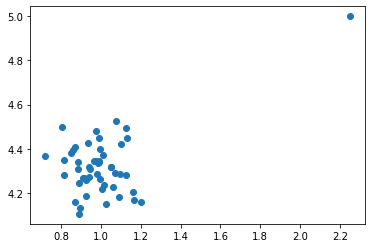

In [15]:
# Générer les données
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

In [16]:
# Création du modèle d'isolation Forest

model_isofo = IsolationForest(contamination=0.01)

anomalies = model_isofo.fit(X)

In [17]:
# Clusters des anomalies
clusters_ano = anomalies.predict(X)

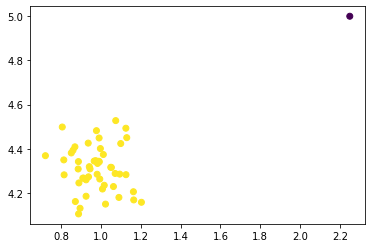

In [18]:
# Visualisation des clusters des anomalies
plt.scatter(X[:,0], X[:, 1], c=clusters_ano)

## 3. DBSCAN

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
db_model = DBSCAN(eps=0.5, min_samples=4)


# modelisation

clustering = db_model.fit(X)

clustering_labels = db_model.fit_predict(X)

In [21]:
X1 = X.copy()
X1 = pd.DataFrame(X1)


clustering_labels

X1['labels'] = clustering_labels


In [22]:

metrics.silhouette_score(X1, X1['labels'])

0.8769059144774929

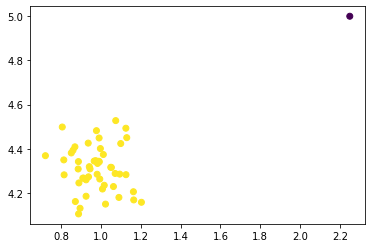

In [23]:
plt.scatter(X[:,0], X[:, 1], c=clustering.labels_ )

In [24]:
# catégorisation
clusters_db = pd.DataFrame({'clusters':clustering.labels_})
clusters_db['clusters'].value_counts()

 0    49
-1     1
Name: clusters, dtype: int64